In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [55]:
# Step 1: Load the dataset
df= pd.read_csv('Cardiotocographic.csv')

In [57]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


# 1.	Data Cleaning and Preparation:

In [60]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [62]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [65]:
# Replacing null value with Mean for numerical columns
from sklearn.impute import SimpleImputer 

In [67]:
simple=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_new=pd.DataFrame(simple.fit_transform(df),columns=df.columns)

In [69]:
df_new.isnull().any()

LB          False
AC          False
FM          False
UC          False
DL          False
DS          False
DP          False
ASTV        False
MSTV        False
ALTV        False
MLTV        False
Width       False
Tendency    False
NSP         False
dtype: bool

In [71]:
#●	Detect and treat outliers 

In [73]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
    print(f"Outliers in {col}:", outliers.sum())

Outliers in LB: 10
Outliers in AC: 40
Outliers in FM: 347
Outliers in UC: 13
Outliers in DL: 125
Outliers in DS: 120
Outliers in DP: 284
Outliers in ASTV: 10
Outliers in MSTV: 80
Outliers in ALTV: 318
Outliers in MLTV: 81
Outliers in Width: 10
Outliers in Tendency: 10
Outliers in NSP: 559


In [76]:
def remove_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


for col in df.select_dtypes(include=['float','int']).columns:
    remove_outliers_iqr(df,col)

In [78]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


# Step 2: Statistical Summary

In [82]:

print("\nStatistical Summary:\n")
summary = df.describe()
print(summary)


Statistical Summary:

                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.00

# 3.	Data Visualization:



In [85]:
#●	Create histograms or boxplots to visualize the distributions of various numerical variables.

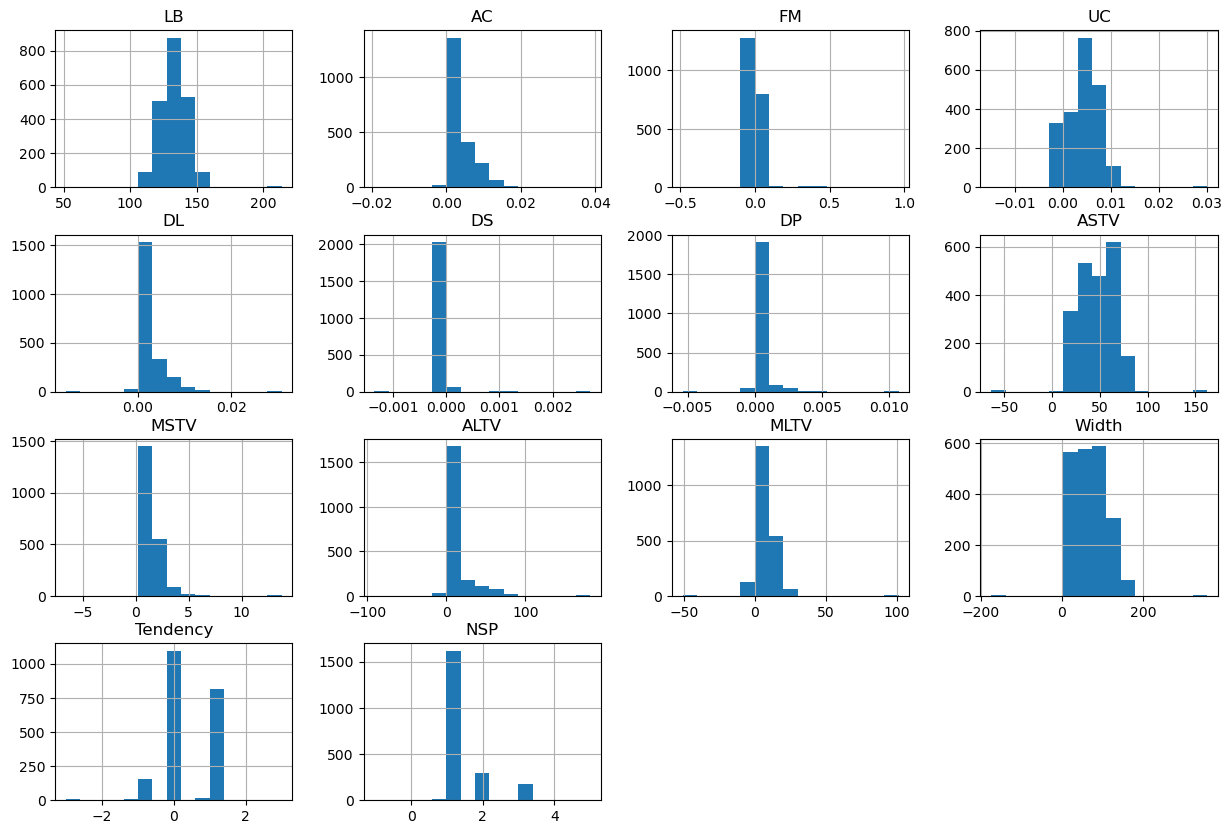

In [87]:
# Histograms
df.hist(bins=15, figsize=(15, 10))
plt.show()

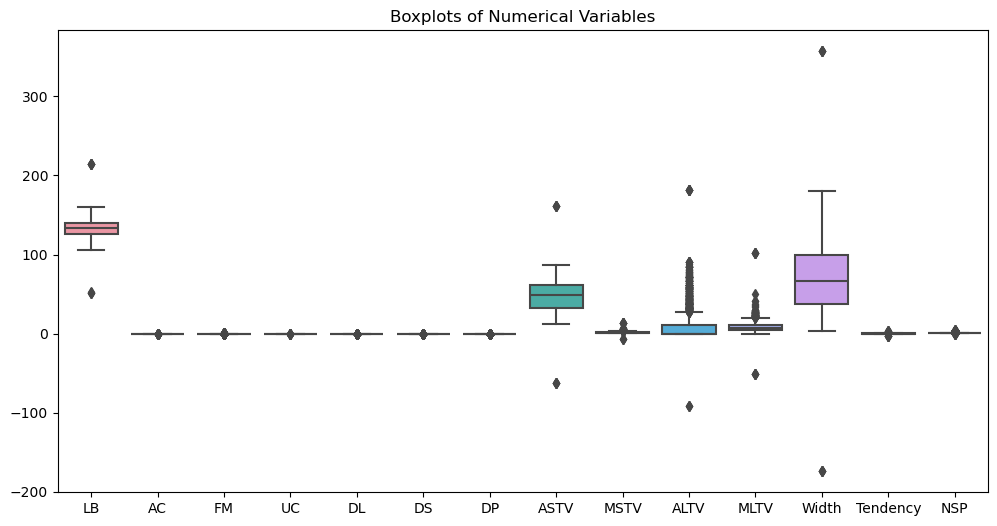

In [88]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplots of Numerical Variables')
plt.show()

In [ ]:
## ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights

# Pair plots for deeper insights
sns.pairplot(df)
plt.show()

# 4.	Pattern Recognition and Insights:

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Key Insights
Strongly Correlated :

The pair of columns (Width,MSTV), (Width,DL) and (MSTV,DL) are highly correlated with each other with the value 0.54 almost. It indicates that when the value increase one another column value also increases simultaneously.

Moderate Correlation :

The pair of column (LB,Tendency),(FM,ASTV) and (DL,Tendency) are moderately correlated with each other.

Weak Correlation :

The columns (MLTV,AC),(ALTV,AC),(MLTV,ASTV),(ALTV,MSTV) are with weak correlation or negative correlation.It indicates that when the value increase in the one column then the value is decrease in the another column

**The dataset set does not contains any date column so it is difficult to Look for trends or patterns over time**

Conclusion:
Key Insights:
Distribution Characteristics:

Many variables exhibit skewness, indicating non-normal distributions. Variables such as 'AC', 'FM', and 'NSP' show significant skewness, suggesting that they may require transformations for certain statistical analyses.
Correlation Patterns:

Strong positive correlations were identified between variables like MSTV and DL, as well as Width and MSTV. These relationships suggest that certain measures of variability are closely related.
Variable Importance:

The 'LB' variable has a wide range, indicating variability in fetal heart rates across observations. This could be critical for assessing fetal well-being.
Potential Redundancies:

High correlations between certain variables suggest redundancy, which could be considered in model development to avoid multicollinearity.

Further Analyses:
Clinical Monitoring:

Understanding the relationships between different cardiotocographic measures can enhance clinical decision-making in fetal monitoring. For instance, recognizing that higher short-term variability correlates with abnormal long-term variability can help clinicians identify at-risk fetuses more effectively.

Predictive Modeling:

The insights gained from the correlation analysis can inform the selection of features for predictive models. Variables that are strongly correlated with outcomes of interest can be prioritized in model development.

Data Transformation:

The non-normal distributions of several variables suggest that data transformations may be necessary to meet the assumptions of parametric statistical tests.